In [5]:
import sys
sys.path.append('../vocaldetection/')
import sklearn
import utils
import json
import os
import pandas as pd
import numpy as np
import seaborn as sns
#import librosa
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
#import medleydb as mdb
%matplotlib inline
import joblib
import scipy.signal

dirname = os.path.dirname('')

In [6]:
# Path for features calculated with Lehner Code
all_feat_path = '/media/DISCO2TB/datasets/MedleyDB/Features/ICASSP2014/'
f = all_feat_path+'ICASSP2014RNN/'
mfcc_path = all_feat_path+'MFCC_29_30_0_0.5_0dt/40_20_40/'

# # Read features and labels
# FEAT_PATH = os.environ["FEAT_PATH"]
# AUDIO_PATH = os.environ["AUDIO_PATH"]
# PIECES = 'split_train_test.json'#os.environ["PIECES_JSON"]
# PIECES_SPLIT =  os.path.join(dirname, 'split_train_test.json')

# Read features and labels
FEAT_PATH = '/media/DISCO2TB/datasets/MedleyDB/Features/'#os.environ["FEAT_PATH"]
AUDIO_PATH = os.environ["AUDIO_PATH"]
PIECES = os.environ["PIECES_JSON"]
PIECES_SPLIT =  os.path.join(dirname, 'split_train_test.json')


In [7]:
train_files = []
test_files = []

with open(PIECES_SPLIT) as json_file:  
    data = json.load(json_file)

    # Load train data
    for music in data['train']:
        train_files.append(music)
    #    print (music)

    # Load test data
    #print ('Test data')
    for music in data['test']:
        test_files.append(music)

In [8]:
import separated_features_training as sf
#X, y = sf.read_all_features(train_files)

#X_test, y_test = sf.read_all_features(test_files)

In [93]:
err_metric = 'precision'

In [94]:
rf = joblib.load('../best_model_RF_MFCC_'+ err_metric +'.sav')

In [95]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
## Evaluate all pieces from test

In [97]:
if err_metric == 'f1':
    df_cm = pd.DataFrame()
    df_acc = pd.DataFrame()

In [98]:
for piece_name in test_files:
    piece_features, piece_labels = sf.read_mfcc_features([piece_name])
    #print (piece_test.shape, piece_features.shape)
    pred_labels = rf.predict(piece_features)
    acc  = sklearn.metrics.accuracy_score(piece_labels, pred_labels)
    cm = sklearn.metrics.confusion_matrix(piece_labels, pred_labels)
    #print (cm, piece_labels, pred_labels)
    
    if len(cm) != 2:
        cm=np.array([[0, 0],[0,10]])
    
    df_cm = df_cm.append({'piece': piece_name,
                          'TP':cm[1][1]/sum(cm[:,1]),
                          'TN':cm[0][0]/sum(cm[:,0]),
                         'error score':err_metric}, ignore_index=True)
    df_acc = df_acc.append({'piece': piece_name,
                            'ACC': acc,
                           'error score':err_metric}, ignore_index=True)

.
> Load data completed!
.
> Load data completed!
.
> Load data completed!
.
> Load data completed!
.
> Load data completed!
.
> Load data completed!
.
> Load data completed!
.
> Load data completed!
.
> Load data completed!
.
> Load data completed!


In [99]:
# Set aesthetics
sns.set(rc={'figure.figsize':(14,5)},font_scale=1.2)

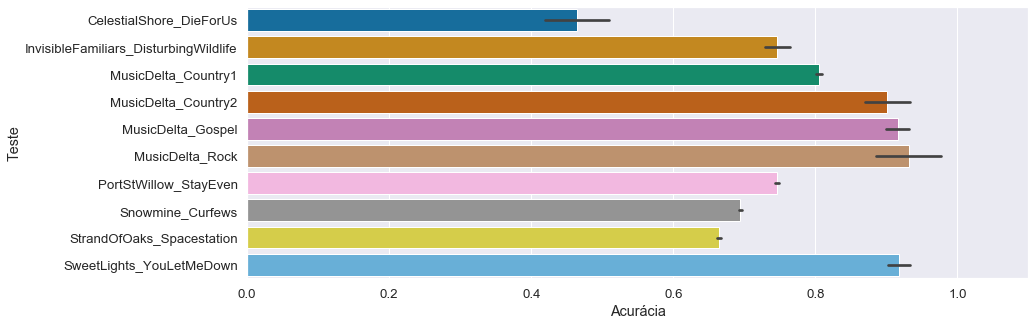

In [100]:
sns.set_palette("colorblind")
sns.barplot(data=df_acc, y='piece',x='ACC').set(xlim=(0,1.1))
plt.ylabel("Teste")
plt.xlabel("Acurácia")
plt.show()

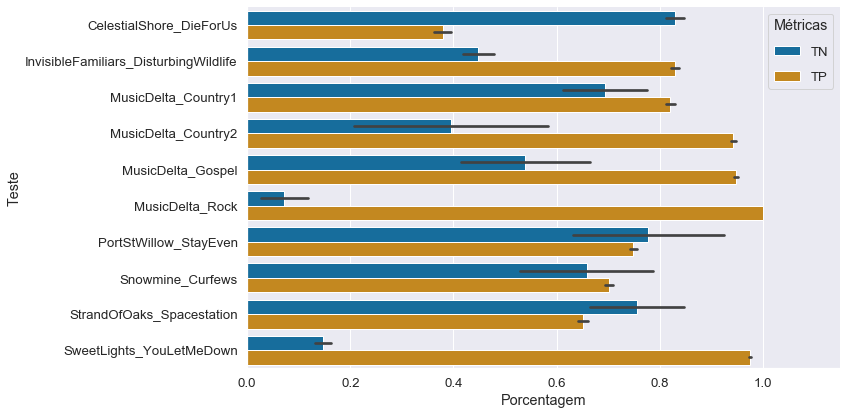

In [101]:
# Show all metrics on one graph
df_cm2 = pd.melt(df_cm, id_vars="piece", var_name="metric", value_name="correct rate", value_vars=['TN', 'TP'])
sns.catplot(y='piece', x='correct rate', hue='metric', data=df_cm2, kind='bar', height=6, aspect=2, legend=False).set(xlim=(0,1.15))
plt.ylabel("Teste")
plt.xlabel("Porcentagem")
plt.legend(frameon=True, labelspacing=1, title='Métricas', loc='best')
plt.show()